# Examining the similarity of NCAA rankings systems
    by Matt Robinson, matthew.robinson@yale.edu, Yale Undergraduate Sports Analytics Group
    
This notebook uses the information compiled on Ken Massey's [site](http://www.masseyratings.com/cf/compare.htm) to examine the similarities between the many different models. 


In [30]:
import numpy as np
import pandas as pd

Let's first download the csv, as derived from the composite rankings on Massey's site:

In [31]:
rankings_df = pd.read_csv('massey_rankings_compare.csv',header=1)
# delete the last extra blank column
rankings_df = rankings_df.iloc[:, :-1]
rankings_df.head()

,Team,ARG,BRN,BWE,CSL,DES,DII,DOK,ENG,FEI,...,MAR,MAS,MGS,MOR,PAY,PFZ,PGH,RWP,TPR,YUSAG
0,Alabama,1,1,1,2,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,1
1,Ohio St,2,6,3,3,2,2,2,2,2,...,4,8,2,4,2,3,2,3,4,2
2,Clemson,3,2,2,1,4,7,9,3,4,...,2,2,6,1,4,2,5,5,2,3
3,Oklahoma,5,4,4,5,6,5,3,7,5,...,5,5,7,5,5,7,7,13,5,6
4,Florida St,7,10,5,11,3,4,4,6,3,...,11,4,3,10,9,9,4,12,3,9


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')

I am going to start by using pandas to plot a scatter matrix. For this, I'll just pick out a small sample of the rankings.

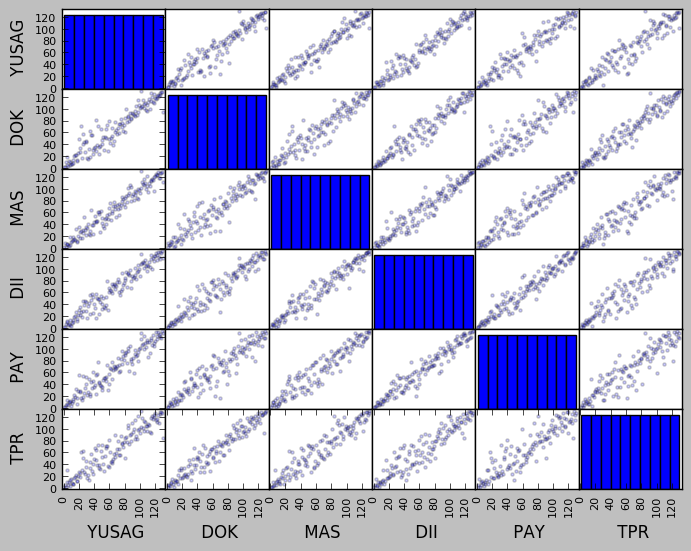

In [46]:
# use pandas to plot scatter matrix, just pick out a small sample of rankings
from pandas.tools.plotting import scatter_matrix
models = [" YUSAG", " DOK", " MAS", " DII", " PAY", " TPR"]
scatter_matrix(rankings_df[models], alpha=0.2, figsize=(8,6))
plt.show()

Now let's make a correlation matrix of all the rankings systems:

In [47]:
# get rid of team names
rankings_df = rankings_df.iloc[:,1:]
# make the matrix
corr_matrix = rankings_df.corr()

Let's check how our YUSAG model correlates with the others:

In [50]:
corr_matrix[" YUSAG"].sort_values(ascending=False)

 YUSAG    1.000000
 LAZ      0.977588
 MAS      0.968351
 BWE      0.964877
 DII      0.963648
 HOW      0.960617
 PGH      0.956416
 BRN      0.955411
 PAY      0.951664
 DES      0.948518
 MOR      0.944099
 DOK      0.942078
 FEI      0.933797
 TPR      0.933442
 RWP      0.927542
 FPI      0.919425
 MGS      0.917246
 ARG      0.914941
 ENG      0.912739
 KEL      0.901760
 MAR      0.885745
 PFZ      0.866474
 CSL      0.788013
Name:  YUSAG, dtype: float64

Now, make a heat map of the entire correlation matrix:

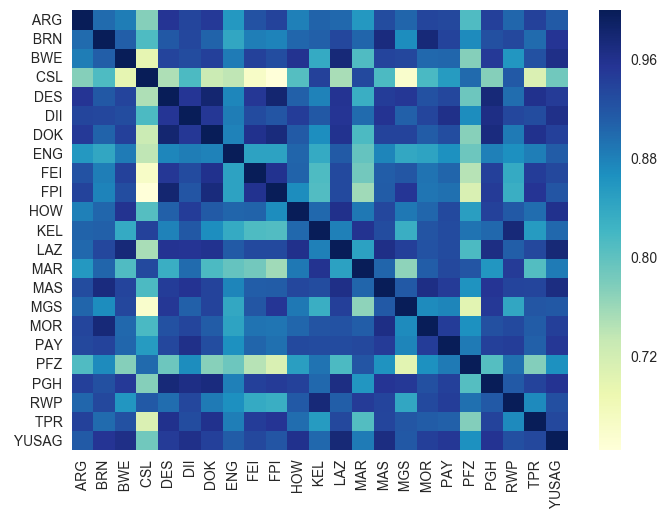

In [73]:
import seaborn as sns
sns.heatmap(corr_matrix,  
            cmap="YlGnBu",
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

The plot above shows that most of the methods are highly correlated. Below, I'm going to try a different color scheme and center just to make it easier to tell the differences.

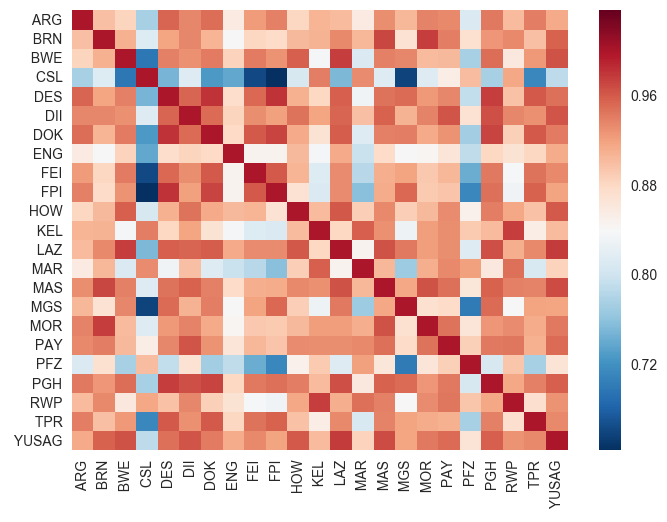

In [74]:
import seaborn as sns
sns.heatmap(corr_matrix,  
            center = 0.84,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)
#cmap="YlGnBu"